***`Universidad de Sonora, Campus Hermosillo`***

---

***`Profesor: `*** *`Lizarraga Celaya Carlos`*

***`Materia: `*** *`Física Computacional`*

---

***`Trabajo: `*** *`Actividad 5`*

---

***`Alumno: `*** *`Bonillas Miranda Akin`*

***`Número de Expediente: `*** *`219211360`*

***`Correo: `*** *`a219211360@unison.mx // akinbonillasmiranda@gmail.com`*

***`Número Telefónico: `*** *`662 368 2474`*

---

***`Grupo: `*** *`2`*

***`Carrera: `*** *`Licenciatura en Física`*

***`Semestre: `*** *`Cuarto Semestre`*

---

***`Viernes 12 de Febrero de 2021, Hermosillo, Sonora`***


.

In [3]:
#==================== Importamos las bibliotecas a utilizar ====================

import pandas as pd             # Importamos Pandas
import numpy as np              # Importamos NumPy
import matplotlib.pyplot as plt # Importamos MatPlotLib
import seaborn as sns           # Importamos SeaBorn
import statsmodels.api as sm    # Importamos Statmodels

%matplotlib inline

#=================== Introducimos el URL del archivo de texto ==================

URL = 'https://raw.githubusercontent.com/Akin-Bonillas-Miranda/Fisica_Computacional/master/Actividad%201/2027.txt'

#============================ Definimos las columnas ===========================

cols = [ "Fecha", "Precip", "Evap", "Tmax", "Tmin" ]

#=========================== Estructuramos el Archivo ==========================

df_data = pd.read_csv( URL, names=cols, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python" )

#======= Hacemos una copia de trabajo y preservamos el DataFrame original ======

df_tran0 = df_data.copy()

#============= Reemplazamos los textos 'Nulo' por espacio en blanco ============

str_nulo = "Nulo"
df_tran1 = df_tran0.replace( to_replace=str_nulo, value=" ", regex=True )

#==== Convertimos los valores de las variables ambientales a núm. flotantes ====

cols_list = [ "Precip", "Evap", "Tmax", "Tmin" ]
for cols in cols_list:
  df_tran1[ cols ] = pd.to_numeric( df_tran1[cols], errors="coerce" )

#====== Hacemos una copia de trabajo y preservamos el DataFrame Modificado =====

df_tran2 = df_tran1.copy()

#================ Conviertimos una cadena en tipo datetime64[ns] ===============

df_tran2[ "Fecha" ] = pd.to_datetime( df_tran2[ "Fecha" ], dayfirst=True ).copy()

#=========== Buscamos ahora añadir dos columnas adicionales: Año, Mes ==========

df_tran2[ "Año" ] = df_tran2[ "Fecha" ].dt.year
df_tran2[ "Mes" ] = df_tran2[ "Fecha" ].dt.month

#== Definimos un nuevo DataFrame para el análisis de los datos meteorológicos == 

df_clim = df_tran2.copy()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_clim_cp = df_clim.copy()

# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_clim_cp = df_clim_cp.set_index('Fecha')

.

***`Actividad 1.`*** *`Explora tus datos de Precipitación los últimos años 1990- fin de datos.`*

In [5]:
#=============================== Grupos de 10 año ==============================

df_57 = df_clim_cp[ (df_clim_cp["Año"] >= 1957) & (df_clim_cp["Año"] < 1960) ]
df_60 = df_clim_cp[ (df_clim_cp["Año"] >= 1960) & (df_clim_cp["Año"] < 1970) ]
df_70 = df_clim_cp[ (df_clim_cp["Año"] >= 1970) & (df_clim_cp["Año"] < 1980) ]
df_80 = df_clim_cp[ (df_clim_cp["Año"] >= 1980) & (df_clim_cp["Año"] < 1990) ]
df_90 = df_clim_cp[ (df_clim_cp["Año"] >= 1990) & (df_clim_cp["Año"] < 2000) ]

*`- Grafica todo el rango de datos utilizando la función df.plot()`*

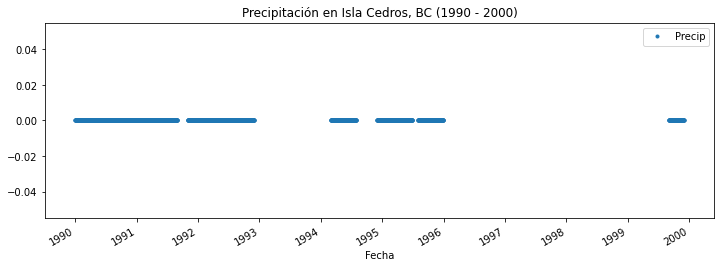

In [7]:
#=============================== Grupo de 10 años ==============================

cols = [ "Precip" ]
ylabel = [ "Precipitación (mm)" ]

axes = df_90[ cols ].plot( marker=".", linestyle="None", figsize=(12, 4) )

plt.title( "Precipitación en Isla Cedros, BC (1990 - 2000)" );

*`- Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos.`*

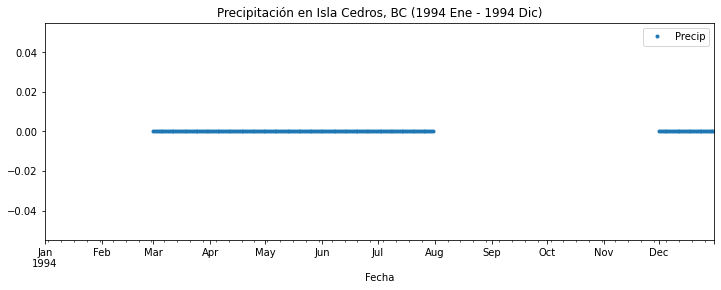

In [8]:
#========================== 1994 Ene 01 - 1994 Dic 31 ==========================

start, end = "1994-01", "1994-12"

cols = [ "Precip" ]
ax_ylabels = [ "Precipitación (mm)" ]

axes = df_90[ cols ].loc[ start:end ].plot( marker=".", linestyle="None", figsize=(12, 4) )

plt.title( "Precipitación en Isla Cedros, BC (1994 Ene - 1994 Dic)" );

*`- Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot().`*

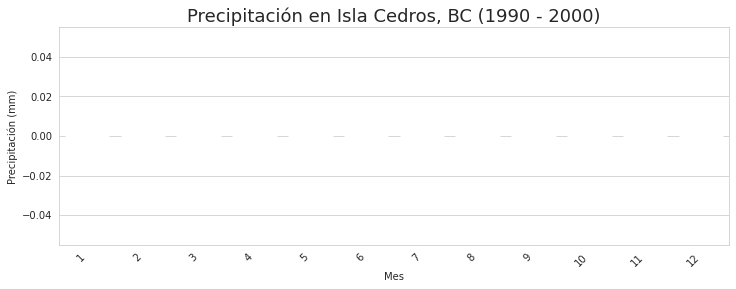

In [9]:
#================================ Precipitación ================================

sns.set_style("whitegrid")

plt.figure(figsize=(12,4)) # Tamaño de la gráfica

P = sns.barplot( x="Mes", y="Precip", data=df_90 );

P.set_xticklabels(P.get_xticklabels(), rotation=45, horizontalalignment="right");

plt.xlabel( "Mes" )
plt.ylabel( "Precipitación (mm)" )
plt.title( "Precipitación en Isla Cedros, BC (1990 - 2000)",  fontsize=18 )

plt.show()

.

***`Actividad 2.`*** *`Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. `*

In [11]:
#=============================== Grupos de 30 año ==============================

df_57 = df_clim_cp[ (df_clim_cp["Año"] >= 1957) & (df_clim_cp["Año"] < 1970) ]
df_70 = df_clim_cp[ (df_clim_cp["Año"] >= 1970) & (df_clim_cp["Año"] < 2000) ]

df_70_1 = df_clim_cp[ (df_clim_cp["Año"] >= 1970) & (df_clim_cp["Año"] < 1985) ]
df_70_2 = df_clim_cp[ (df_clim_cp["Año"] >= 1985) & (df_clim_cp["Año"] < 2000) ]

*`En el caso de mis datos no hay 30 años después de 1990, sino tan solo 10, por lo que tomaré los datos desde 1970.`*

*`- Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio.`*

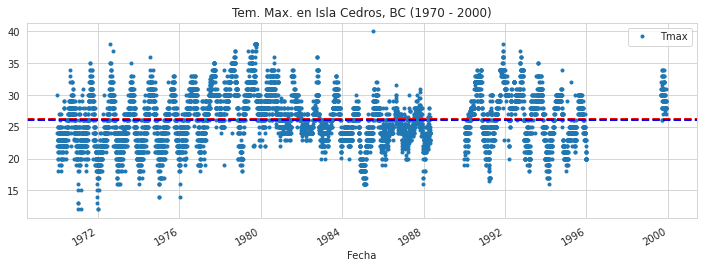

In [14]:
#=============================== Grupo de 30 años ==============================

sns.set_style( "whitegrid" )

cols = [ "Tmax" ]
ylabels = [ "Tem. Max. (°C)" ]

axes = df_70[ cols ].plot( marker=".", linestyle="None", figsize=(12, 4) )

Txprom70 = df_70_1.Tmax.mean()
Txprom85 = df_70_2.Tmax.mean()

plt.axhline( Txprom70, color = "r", linestyle="--", linewidth=2 );
plt.axhline( Txprom85, color = "b", linestyle="--", linewidth=2 );

plt.title( "Tem. Max. en Isla Cedros, BC (1970 - 2000)" );

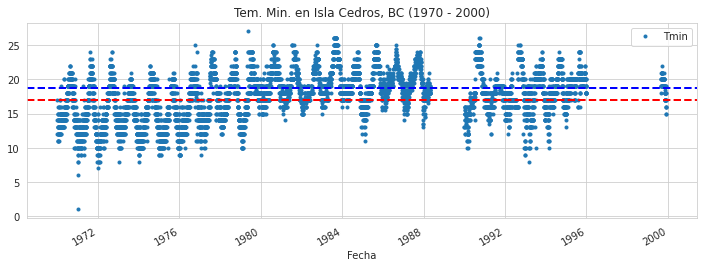

In [15]:
#=============================== Grupo de 30 años ==============================

sns.set_style( "whitegrid" )

cols = [ "Tmin" ]
ax_ylabels = [ "Tem. Min. (°C)" ]

axes = df_70[ cols ].plot( marker=".", linestyle="None", figsize=(12, 4) )

Tnprom70 = df_70_1.Tmin.mean()
Tnprom85 = df_70_2.Tmin.mean()

plt.axhline( Tnprom70, color = "r", linestyle="--", linewidth=2 );
plt.axhline( Tnprom85, color = "b", linestyle="--", linewidth=2 );

plt.title( "Tem. Min. en Isla Cedros, BC (1970 - 2000)" );

*`- Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc().`*

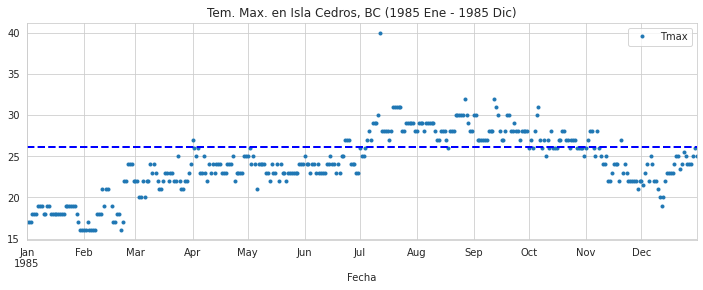

In [16]:
#========================== 1985 Ene 01 - 1985 Dic 31 ==========================

start, end = "1985-01", "1985-12"

sns.set_style( "whitegrid" )

cols = [ "Tmax" ]
ylabels = [ "Tem. Max. (°C)" ]

axes = df_70[ cols ].loc[ start:end ].plot( marker=".", linestyle="None", figsize=(12, 4) )

Txprom85 = df_70_2.Tmax.mean()
plt.axhline( Txprom85, color = "b", linestyle="--", linewidth=2 );

plt.title( "Tem. Max. en Isla Cedros, BC (1985 Ene - 1985 Dic)" );

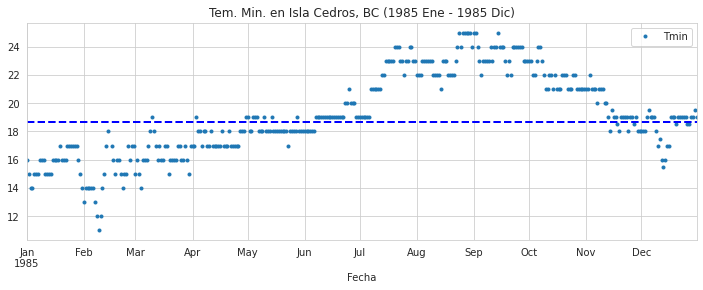

In [17]:
#========================== 1985 Ene 01 - 1985 Dic 31 ==========================

start, end = "1985-01", "1985-12"

sns.set_style( "whitegrid" )

cols = [ "Tmin" ]
ylabels = [ "Tem. Min. (°C)" ]

axes = df_70[ cols ].loc[ start:end ].plot( marker=".", linestyle="None", figsize=(12, 4) )

Tnprom85 = df_70_2.Tmin.mean()
plt.axhline( Tnprom85, color = "b", linestyle="--", linewidth=2 );

plt.title( "Tem. Min. en Isla Cedros, BC (1985 Ene - 1985 Dic)" );

*`- Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.`*  

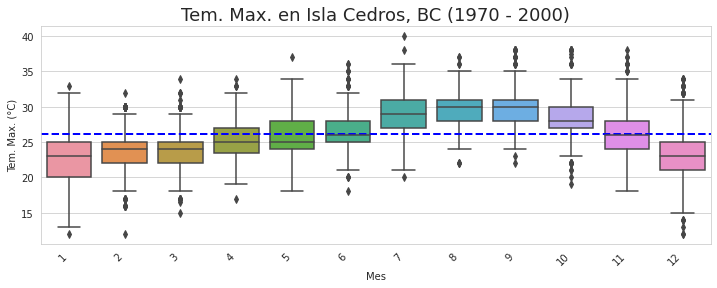

In [19]:
#================================ Precipitación ================================

sns.set_style('whitegrid')

plt.figure(figsize=(12,4))

P = sns.boxplot( x="Mes", y="Tmax", data=df_70 );

P.set_xticklabels(P.get_xticklabels(), rotation=45, horizontalalignment="right");

Txprom85 = df_70.Tmax.mean()
plt.axhline(Txprom85, color = "b", linestyle="--", linewidth=2);

plt.xlabel( "Mes" )
plt.ylabel( "Tem. Max. (°C)" )
plt.title( "Tem. Max. en Isla Cedros, BC (1970 - 2000)",  fontsize=18)

plt.show()

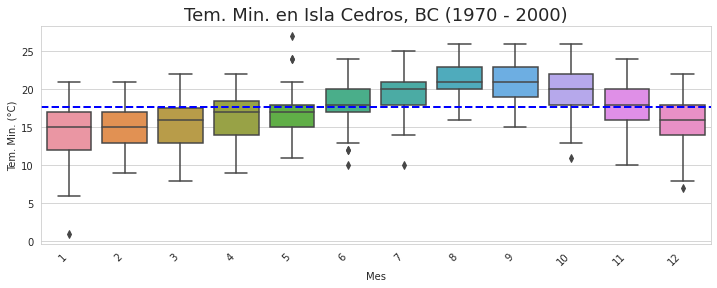

In [20]:
#=================================== Tem. Min ==================================

sns.set_style('whitegrid')

plt.figure(figsize=(12,4)) 

P = sns.boxplot( x="Mes", y="Tmin", data=df_70 );

P.set_xticklabels(P.get_xticklabels(), rotation=45, horizontalalignment="right");

Tnprom85 = df_70.Tmin.mean()
plt.axhline(Tnprom85, color = "b", linestyle="--", linewidth=2);

plt.xlabel( "Mes" )
plt.ylabel( "Tem. Min. (°C)" )
plt.title( "Tem. Min. en Isla Cedros, BC (1970 - 2000)",  fontsize=18)

plt.show()

.

***`Actividad 3.`*** *`Realiza el mismo análisis que en la Actividad 2, pero para la variable de Evaporación.`*

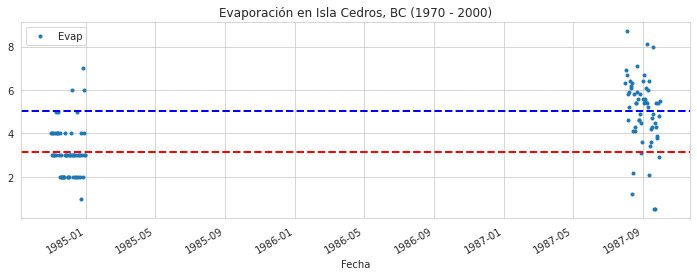

In [22]:
#=============================== Grupo de 30 años ==============================

sns.set_style('whitegrid')

cols = [ "Evap" ]
ax_ylabels = [ "Evaporación (mm)" ]

axes = df_70[ cols ].plot( marker=".", linestyle="None", figsize=(12, 4), subplots=True )

Eprom70 = df_70_1.Evap.mean()
Eprom85 = df_70_2.Evap.mean()

plt.axhline(Eprom70, color="r", linestyle="--", linewidth=2);
plt.axhline(Eprom85, color="b", linestyle="--", linewidth=2);

plt.title( "Evaporación en Isla Cedros, BC (1970 - 2000)" );

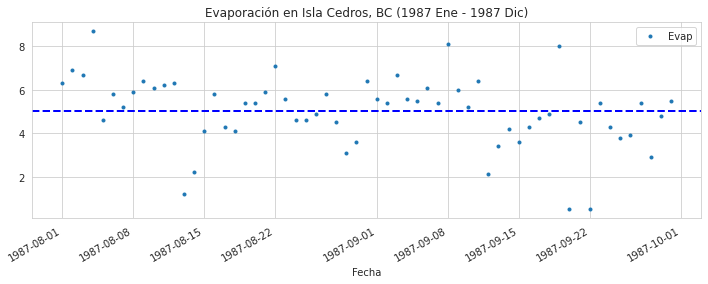

In [23]:
#========================== 1987 Ene 01 - 1987 Dic 31 ==========================

start, end = "1987-01", "1987-12"

sns.set_style('whitegrid')

cols = [ "Evap" ]
ylabels = [ "Evaporación (mm)" ]

axes = df_70[ cols ].loc[ start:end ].plot( marker=".", linestyle="None", figsize=(12, 4) )

Eprom85 = df_70_2.Evap.mean()
plt.axhline(Eprom85, color = "b", linestyle="--", linewidth=2 );

plt.title( "Evaporación en Isla Cedros, BC (1987 Ene - 1987 Dic)" );

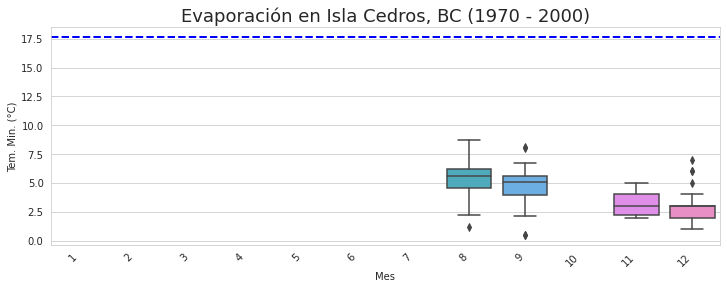

In [25]:
#=================================== Tem. Min ==================================

sns.set_style('whitegrid')

plt.figure(figsize=(12,4)) 

P = sns.boxplot( x="Mes", y="Evap", data=df_70 );

P.set_xticklabels(P.get_xticklabels(), rotation=45, horizontalalignment="right");

Tnprom85 = df_70.Tmin.mean()
plt.axhline(Tnprom85, color = "b", linestyle="--", linewidth=2);

plt.xlabel( "Mes" )
plt.ylabel( "Tem. Min. (°C)" )
plt.title( "Evaporación en Isla Cedros, BC (1970 - 2000)",  fontsize=18)

plt.show()

.

***`Actividad 4.`***  *`Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:`*

In [26]:
#=============================== 7, 30, 365 días ===============================

cols = [ "Evap", "Tmax", "Tmin" ]

df_70_7d = df_70[cols].rolling(7, center=True).mean()
df_70_30d = df_70[cols].rolling(30, center=True).mean()
df_70_365d = df_70[cols].rolling(365, center=True).mean() 


*`- Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días.`* 

*`Temperatura Máxima`*

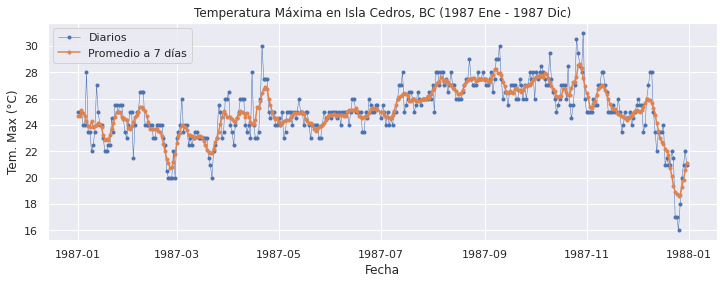

In [28]:
#========================== Promedio a 7 días ( Tmax ) =========================

start, end = "1987-01", "1987-12"

sns.set( rc={"figure.figsize":(12, 4)} )

fig, ax = plt.subplots()
ax.plot( df_70.loc[start:end, "Tmax"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )

ax.plot( df_70_7d.loc[start:end, "Tmax"], marker=".", linestyle="-", label="Promedio a 7 días")

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Tem. Max (°C)" )
ax.set_title( "Temperatura Máxima en Isla Cedros, BC (1987 Ene - 1987 Dic)" )
ax.legend();

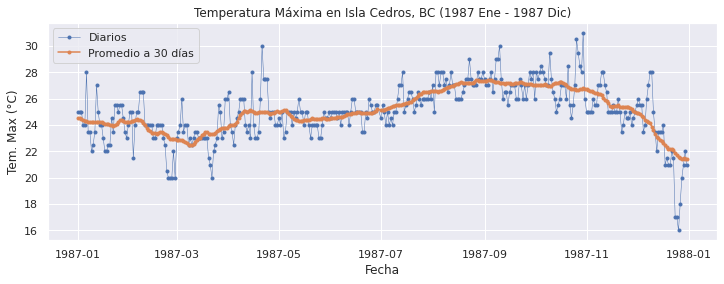

In [29]:
#========================= Promedio a 30 días ( Tmax ) =========================

start, end = "1987-01", "1987-12"

sns.set( rc={"figure.figsize":(12, 4)} )

fig, ax = plt.subplots()
ax.plot( df_70.loc[start:end, "Tmax"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )

ax.plot( df_70_30d.loc[start:end, "Tmax"], marker=".", linestyle="-", label="Promedio a 30 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Tem. Max (°C)" )
ax.set_title( "Temperatura Máxima en Isla Cedros, BC (1987 Ene - 1987 Dic)" )
ax.legend();

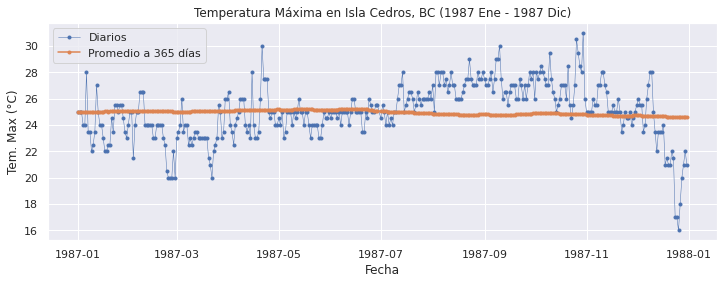

In [30]:
#========================= Promedio a 365 días ( Tmax ) ========================

start, end = "1987-01", "1987-12"

sns.set( rc={"figure.figsize":(12, 4)} )

fig, ax = plt.subplots()
ax.plot( df_70.loc[start:end, "Tmax"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )

ax.plot( df_70_365d.loc[start:end, "Tmax"], marker=".", linestyle="-", label="Promedio a 365 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Tem. Max (°C)" )
ax.set_title( "Temperatura Máxima en Isla Cedros, BC (1987 Ene - 1987 Dic)" )
ax.legend();

*`Temperatura Mínima`*

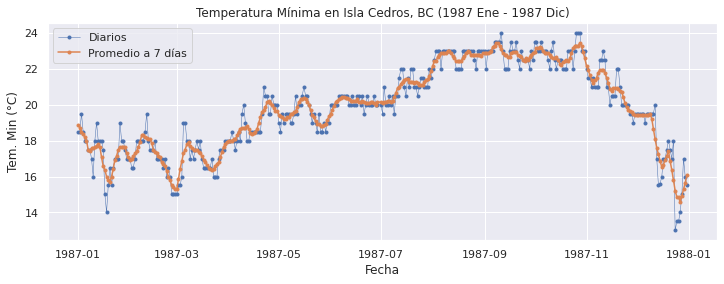

In [31]:
#========================== Promedio a 7 días ( Tmin ) =========================

start, end = "1987-01", "1987-12"

sns.set( rc={"figure.figsize":(12, 4)} )

fig, ax = plt.subplots()
ax.plot( df_70.loc[start:end, "Tmin"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )
ax.plot( df_70_7d.loc[start:end, "Tmin"], marker=".", linestyle="-", label="Promedio a 7 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Tem. Min (°C)" )
ax.set_title( "Temperatura Mínima en Isla Cedros, BC (1987 Ene - 1987 Dic)" )
ax.legend();

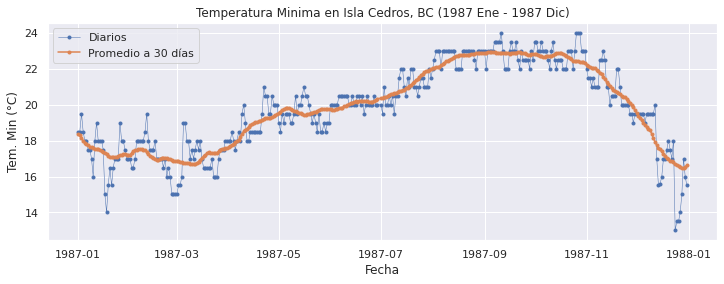

In [32]:
#========================= Promedio a 30 días ( Tmin ) =========================

start, end = '1987-01', '1987-12'

sns.set(rc={'figure.figsize':(12, 4)})

fig, ax = plt.subplots()
ax.plot( df_70.loc[start:end, "Tmin"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )
ax.plot( df_70_30d.loc[start:end, "Tmin"], marker=".", linestyle="-", label="Promedio a 30 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Tem. Min (°C)" )
ax.set_title( "Temperatura Minima en Isla Cedros, BC (1987 Ene - 1987 Dic)" )
ax.legend();

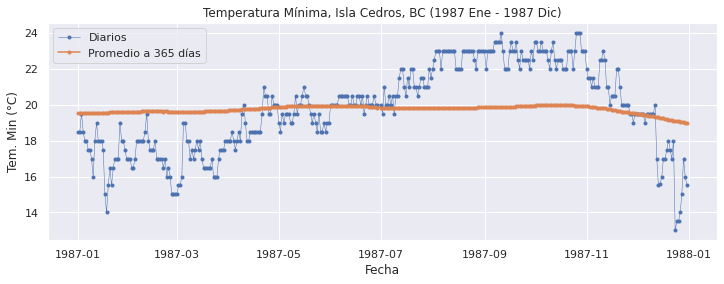

In [33]:
#========================= Promedio a 365 días ( Tmin ) ========================

start, end = "1987-01", "1987-12"

sns.set( rc={"figure.figsize":(12, 4)} )

fig, ax = plt.subplots()
ax.plot( df_70.loc[start:end, "Tmin"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )
ax.plot( df_70_365d.loc[start:end, "Tmin"], marker=".", linestyle="-", label="Promedio a 365 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Tem. Min (°C)" )
ax.set_title( "Temperatura Mínima, Isla Cedros, BC (1987 Ene - 1987 Dic)" )
ax.legend();

*`Evaporación`*

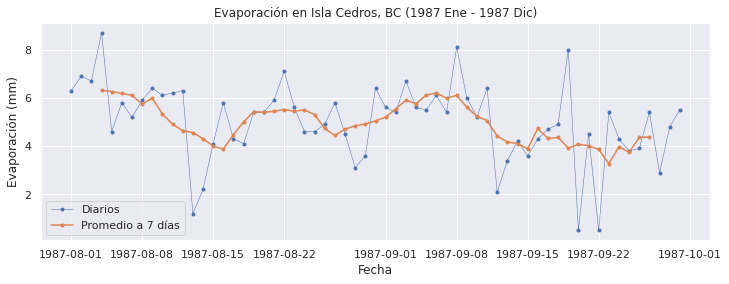

In [34]:
#========================= Promedio a 7 días ( Pprecip ) =======================

start, end = "1987-01", "1987-12"

sns.set( rc={"figure.figsize":(12, 4)} )

fig, ax = plt.subplots()
ax.plot( df_70.loc[start:end, "Evap"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )
ax.plot( df_70_7d.loc[start:end, "Evap"], marker=".", linestyle="-", label="Promedio a 7 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Evaporación (mm)" )
ax.set_title( "Evaporación en Isla Cedros, BC (1987 Ene - 1987 Dic)" )
ax.legend();

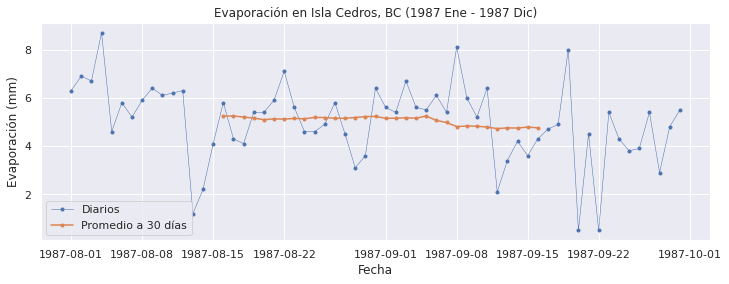

In [35]:
#======================== Promedio a 30 días ( Precip ) ========================

start, end = "1987-01", "1987-12"

sns.set( rc={"figure.figsize":(12, 4)} )

fig, ax = plt.subplots()
ax.plot( df_70.loc[start:end, "Evap"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )
ax.plot( df_70_30d.loc[start:end, "Evap"], marker=".", linestyle="-", label="Promedio a 30 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Evaporación (mm)" )
ax.set_title( "Evaporación en Isla Cedros, BC (1987 Ene - 1987 Dic)" )
ax.legend();

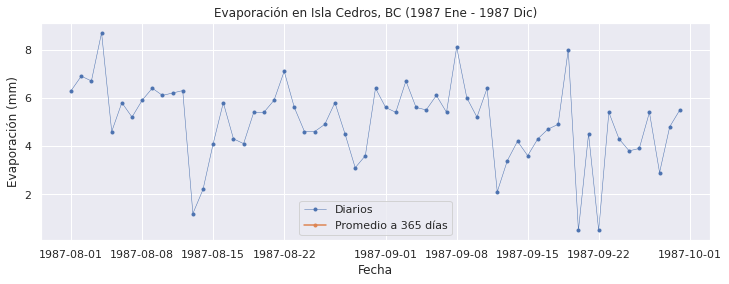

In [36]:
#======================== Promedio a 365 días ( Precip ) =======================

start, end = '1987-01', '1987-12'

sns.set(rc={'figure.figsize':(12, 4)})

fig, ax = plt.subplots()
ax.plot( df_70.loc[start:end, "Evap"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )
ax.plot( df_70_365d.loc[start:end, "Evap"], marker=".", linestyle="-", label="Promedio a 365 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Evaporación (mm)" )
ax.set_title( "Evaporación en Isla Cedros, BC (1987 Ene - 1987 Dic)" )
ax.legend();

*`- Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.`*

In [37]:
#=============================== Grupo de 10 años ==============================

df_80 = df_clim_cp[ (df_clim_cp["Año"] >= 1980) & (df_clim_cp["Año"] < 1990) ]

#=============================== 7, 30, 365 días ===============================

cols = [ "Evap", "Tmax", "Tmin" ]

df_80_7d = df_80[cols].rolling(7, center=True).mean()
df_80_30d = df_80[cols].rolling(30, center=True).mean()
df_80_365d = df_80[cols].rolling(365, center=True).mean() 

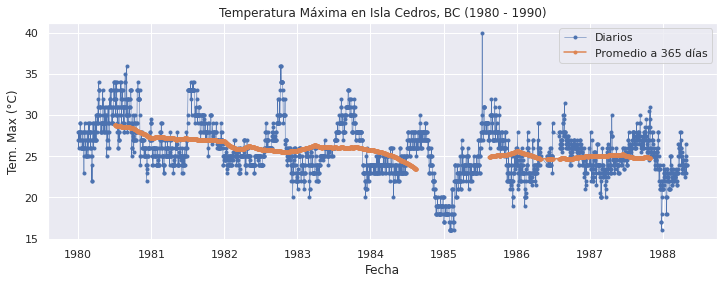

In [38]:
#========================= Promedio a 365 días ( Tmax ) ========================

start, end = "1980-01-01", "1990-12-31"

sns.set( rc={"figure.figsize":(12, 4)} )

fig, ax = plt.subplots()
ax.plot( df_80.loc[start:end, "Tmax"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )
ax.plot( df_80_365d.loc[start:end, "Tmax"], marker=".", linestyle="-", label="Promedio a 365 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Tem. Max (°C)" )
ax.set_title( "Temperatura Máxima en Isla Cedros, BC (1980 - 1990)" )
ax.legend();

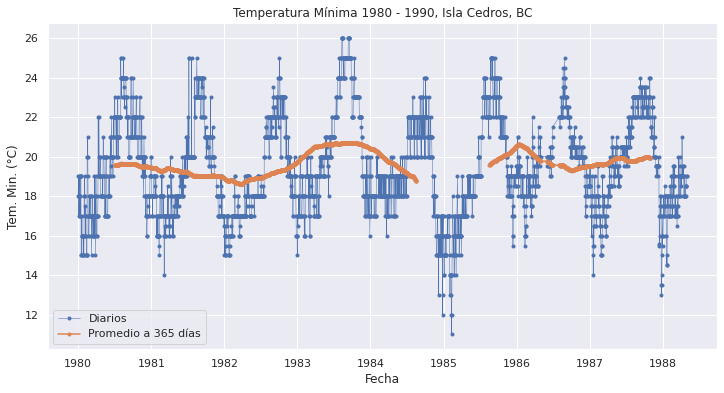

In [ ]:
#========================= Promedio a 365 días ( Tmin ) ========================

start, end = "1980-01-01", "1990-12-31"

sns.set( rc={"figure.figsize":(12, 6)} )

fig, ax = plt.subplots()
ax.plot( df_80.loc[start:end, "Tmin"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )

ax.plot(df_80_365d.loc[start:end, "Tmin"], marker=".", linestyle="-", label="Promedio a 365 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Tem. Min. (°C)" )
ax.set_title( "Temperatura Mínima, Isla Cedros, BC, de 1980 - 1990" )
ax.legend();

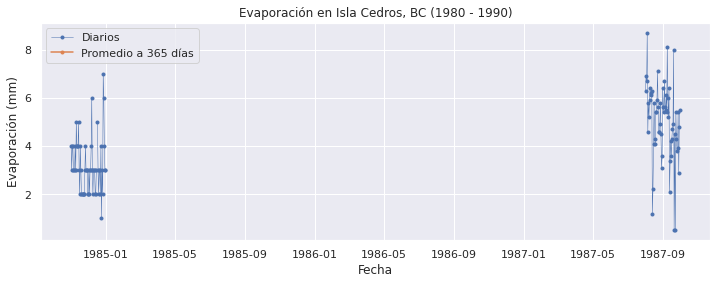

In [39]:
#========================= Promedio a 365 días ( Evap ) ========================

start, end = "1980-01-01", "1990-12-31"

sns.set( rc={"figure.figsize":(12, 4)} )

fig, ax = plt.subplots()
ax.plot( df_80.loc[start:end, "Evap"], marker=".", linestyle="-", linewidth=0.5, label="Diarios" )
ax.plot( df_80_365d.loc[start:end, "Evap"], marker=".", linestyle="-", label="Promedio a 365 días" )

ax.set_xlabel( "Fecha" )
ax.set_ylabel( "Evaporación (mm)" )
ax.set_title( "Evaporación en Isla Cedros, BC (1980 - 1990)" )
ax.legend();

.

***`Actividad 5.`*** *`Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo.`*

*`Aplica la función seasonal_decompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.`*

*`Temperatura Máxima`*

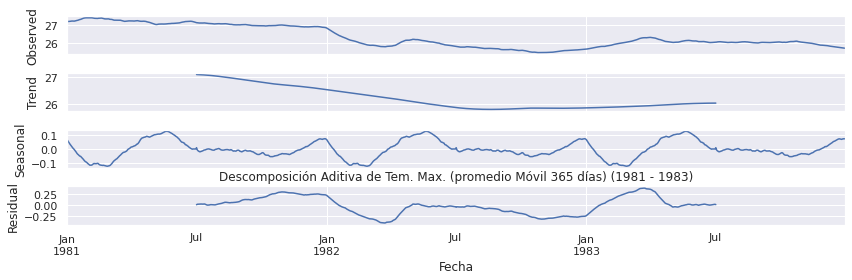

In [41]:
#========================== Tem. Max. 1981 - 1983 365d =========================

sns.set( rc={"figure.figsize":(12, 4)} )

start, end = "1981-01-01", "1983-12-31"

decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
resTmax = sm.tsa.seasonal_decompose( df_80_365d.loc[start:end, "Tmax"].interpolate(), freq=decompfreq, model="additive" )

resTmax.plot()

plt.title( "Descomposición Aditiva de Tem. Max. (promedio Móvil 365 días) (1981 - 1983)" );

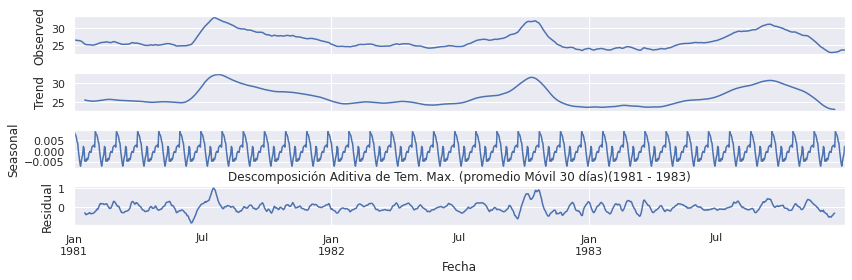

In [42]:
#========================== Tem. Max. 1981 - 1983 30d ==========================

sns.set( rc={"figure.figsize":(12, 4)} )

start, end = "1981-01-01", "1983-12-31"

decompfreq = 30

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
resTmax = sm.tsa.seasonal_decompose( df_80_30d.loc[start:end, "Tmax"].interpolate(), freq=decompfreq, model="additive" )

resTmax.plot()

plt.title( "Descomposición Aditiva de Tem. Max. (promedio Móvil 30 días)(1981 - 1983)" );

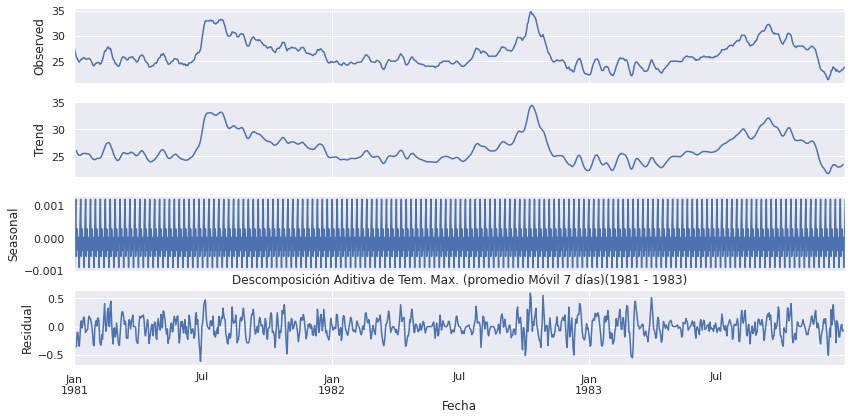

In [43]:
#=========================== Tem. Max. 1981 - 1983 7d ==========================

sns.set( rc={"figure.figsize":(12, 6)} )

start, end = "1981-01-01", "1983-12-31"

decompfreq = 7

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
resTmax = sm.tsa.seasonal_decompose( df_80_7d.loc[start:end, "Tmax"].interpolate(), freq=decompfreq, model="additive" )

resTmax.plot()

plt.title( "Descomposición Aditiva de Tem. Max. (promedio Móvil 7 días)(1981 - 1983)");

*`Temperatura Mínima`*

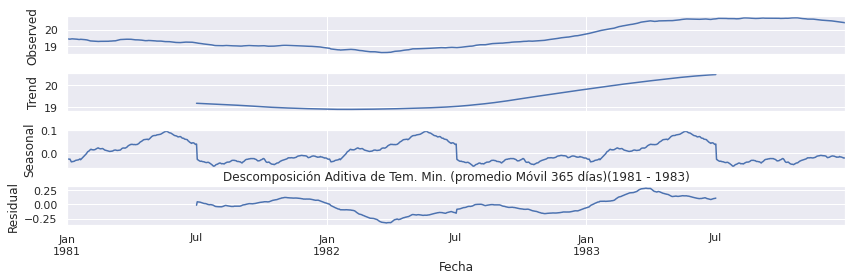

In [45]:
#========================== Tem. Min. 1981 - 1983 365d =========================

sns.set( rc={"figure.figsize":(12, 4)} )

start, end = "1981-01-01", "1983-12-31"

decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
resTmax = sm.tsa.seasonal_decompose( df_80_365d.loc[start:end, "Tmin"].interpolate(), freq=decompfreq, model="additive" )

resTmax.plot()

plt.title( "Descomposición Aditiva de Tem. Min. (promedio Móvil 365 días)(1981 - 1983)" );

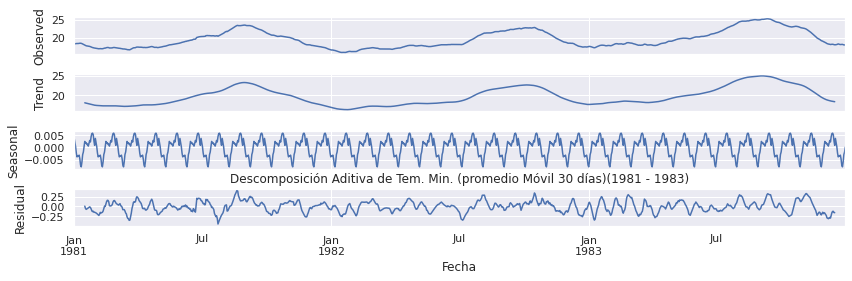

In [46]:
#========================== Tem. Min. 1981 - 1983 30d ==========================

sns.set( rc={"figure.figsize":(12, 4)} )

start, end = "1981-01-01", "1983-12-31"

decompfreq = 30

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
resTmax = sm.tsa.seasonal_decompose( df_80_30d.loc[start:end, "Tmin"].interpolate(), freq=decompfreq, model="additive" )

resTmax.plot()

plt.title( "Descomposición Aditiva de Tem. Min. (promedio Móvil 30 días)(1981 - 1983)" );

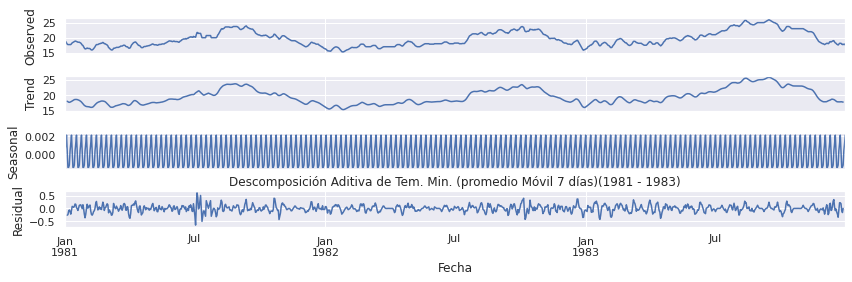

In [47]:
#=========================== Tem. Min. 1981 - 1983 7d ==========================

sns.set( rc={"figure.figsize":(12, 4)} )

start, end = "1981-01-01", "1983-12-31"

decompfreq = 7

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
resTmax = sm.tsa.seasonal_decompose( df_80_7d.loc[start:end, "Tmin"].interpolate(), freq=decompfreq, model="additive" )

resTmax.plot()

plt.title( "Descomposición Aditiva de Tem. Min. (promedio Móvil 7 días)(1981 - 1983)" );

.

***`Actividad 6.`*** *`Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos. `*

In [48]:
#=============================== Grupos de 30 año ==============================

df_57 = df_clim_cp[ (df_clim_cp["Año"] >= 1957) & (df_clim_cp["Año"] < 1970) ]
df_70 = df_clim_cp[ (df_clim_cp["Año"] >= 1970) & (df_clim_cp["Año"] < 2000) ]

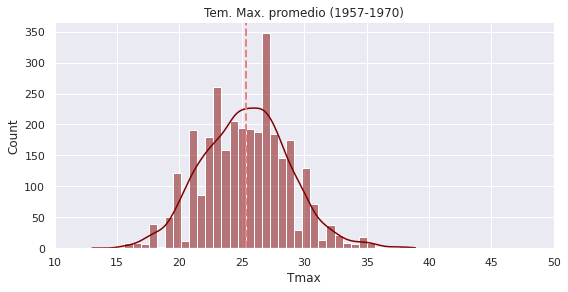

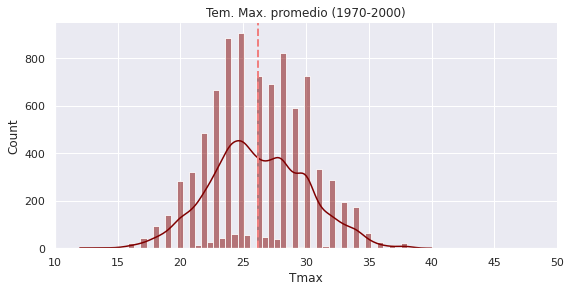

Tem. Max. promedio (1957 - 1970)=  25.351945963332206 °C
Tem. Max. promedio (1970 - 2000)=  26.201752006329833 °C


In [55]:
#================ Gráfica de distribuciones de Temperaturas Tmax ===============

g1 = sns.displot( df_57.Tmax, kde=True, color="maroon", height=4, aspect=2 );
plt.axvline(df_57.Tmax.mean(), linestyle="--", linewidth=2, color="lightcoral");
g1.set(title="Tem. Max. promedio (1957-1970)");
g1.set(xlim=(10,50))

g2 = sns.displot(df_70.Tmax, kde=True, color="maroon", height=4, aspect=2);
plt.axvline(df_70.Tmax.mean(), linestyle="--", linewidth=2, color="lightcoral");
g2.set(title="Tem. Max. promedio (1970-2000)");
g2.set(xlim=(10,50))

plt.show();

print("Tem. Max. promedio (1957 - 1970)= ", df_57.Tmax.mean(), "°C" )
print("Tem. Max. promedio (1970 - 2000)= ", df_70.Tmax.mean(), "°C" )

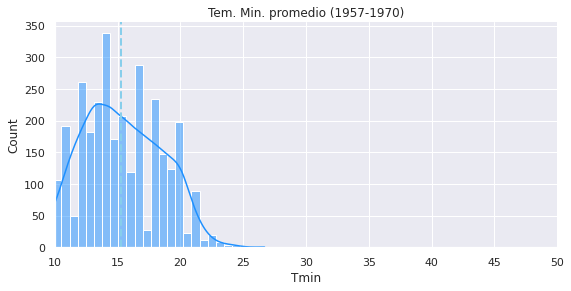

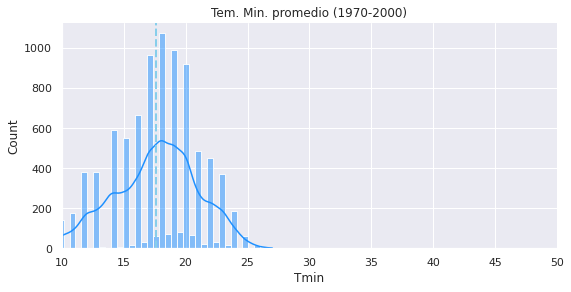

Tem. Min. promedio (1957 - 1970)=  15.25093367675465 °C
Tem. Min. promedio (1970 - 2000)=  17.641907775768537 °C


In [56]:
#================ Gráfica de distribuciones de Temperaturas Tmin ===============

g1 = sns.displot(df_57.Tmin, kde=True, color="dodgerblue", height=4, aspect=2);
plt.axvline(df_57.Tmin.mean(), linestyle="--", linewidth=2, color="skyblue");
g1.set(title="Tem. Min. promedio (1957-1970)");
g1.set(xlim=(10,50))


g2 = sns.displot(df_70.Tmin, kde=True, color="dodgerblue", height=4, aspect=2);
plt.axvline(df_70.Tmin.mean(), linestyle="--", linewidth=2, color="skyblue");
g2.set(title="Tem. Min. promedio (1970-2000)");
g2.set(xlim=(10,50))

plt.show();

print("Tem. Min. promedio (1957 - 1970)= ", df_57.Tmin.mean(), "°C" )
print("Tem. Min. promedio (1970 - 2000)= ", df_70.Tmin.mean(), "°C" )